# Progress Steps
* So are we going to be rich?
 * I have bank accounts in NZD, GOLD, AUS, UK and USD
 * Where should I put my money?
* What is a cross currency?
* Are the times correct for gold?
* Where do I get the data?

* What makes a good prediction?
 * Tomorrows prediction?
 * A few days out?
 * Binary or multiclass?
 * Scoring, Accuracy v precision
 
* Results
 * Prediction over 1 year
 * ~~Predict days in the future [1, 7, 30, 90]~~
 * ~~Predict one vs rest~~
 * Show accuracy over the year
 * Threshold

* Training data
    * Previous [10y, 5y, 2y, 1y, 6m]
    * Retraining
        
* Retraining
 * How does retrianing affect the result?
 * Which windows to use?
 
* Feature selection
1. Daily rates
    1. 5, 30 and 90 day windows

* Comparing classifiers
 * Decision tree
 * SVM
 * Logistic regression
 * Ada boost
 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import helper1 as hlp

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

INFO:root:LOADING Helper1 :-)2016-05-30 23:55:48.075503
INFO:root:fookit, lets see is we can predict


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

clfs = [
    (DecisionTreeClassifier(), {'max_depth' : range(3, 10)}),
    (SVC(), {'C' : np.logspace(-6, -1, 10)}),
    (LogisticRegression(), {'C' : np.logspace(-6, -1, 10)}),
    (AdaBoostClassifier(DecisionTreeClassifier()), {'base_estimator__max_depth' : range(3, 10)})
]

INFO:root:Load currencies
INFO:root:Loading file:currencies
INFO:root:Are we using the correct timezone?
INFO:root:inverse currencies so they are all 'how many x does 1 usd buy'
INFO:root:Lets get the gold
INFO:root:Loading file:LBMA_GOLD
INFO:root:Forward fill weekends and holidays
INFO:root:Set date range Dates
INFO:root:Using aa 15 year period of data
INFO:root:calculate daily returns
INFO:root:caluclate rolling averages:mean


['GOLD' 'JPY' 'AUD' 'GBP' 'NZD' 'CNY' 'CAD' 'CHF' 'EUR']
['GOLD_dr' 'JPY_dr' 'AUD_dr' 'GBP_dr' 'NZD_dr' 'CNY_dr' 'CAD_dr' 'CHF_dr'
 'EUR_dr']
['GOLD_dr_mean_2' 'JPY_dr_mean_2' 'AUD_dr_mean_2' 'GBP_dr_mean_2'
 'NZD_dr_mean_2' 'CNY_dr_mean_2' 'CAD_dr_mean_2' 'CHF_dr_mean_2'
 'EUR_dr_mean_2' 'GOLD_dr_mean_7' 'JPY_dr_mean_7' 'AUD_dr_mean_7'
 'GBP_dr_mean_7' 'NZD_dr_mean_7' 'CNY_dr_mean_7' 'CAD_dr_mean_7'
 'CHF_dr_mean_7' 'EUR_dr_mean_7' 'GOLD_dr_mean_30' 'JPY_dr_mean_30'
 'AUD_dr_mean_30' 'GBP_dr_mean_30' 'NZD_dr_mean_30' 'CNY_dr_mean_30'
 'CAD_dr_mean_30' 'CHF_dr_mean_30' 'EUR_dr_mean_30' 'GOLD_dr_mean_90'
 'JPY_dr_mean_90' 'AUD_dr_mean_90' 'GBP_dr_mean_90' 'NZD_dr_mean_90'
 'CNY_dr_mean_90' 'CAD_dr_mean_90' 'CHF_dr_mean_90' 'EUR_dr_mean_90']


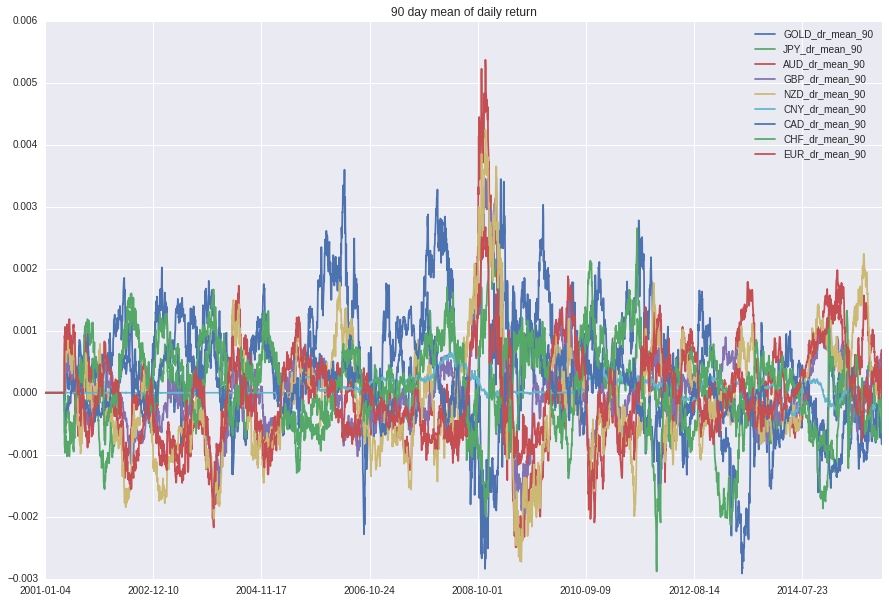

INFO:root:caluclate rolling averages:std


['GOLD_dr_std_2' 'JPY_dr_std_2' 'AUD_dr_std_2' 'GBP_dr_std_2'
 'NZD_dr_std_2' 'CNY_dr_std_2' 'CAD_dr_std_2' 'CHF_dr_std_2' 'EUR_dr_std_2'
 'GOLD_dr_std_7' 'JPY_dr_std_7' 'AUD_dr_std_7' 'GBP_dr_std_7'
 'NZD_dr_std_7' 'CNY_dr_std_7' 'CAD_dr_std_7' 'CHF_dr_std_7' 'EUR_dr_std_7'
 'GOLD_dr_std_30' 'JPY_dr_std_30' 'AUD_dr_std_30' 'GBP_dr_std_30'
 'NZD_dr_std_30' 'CNY_dr_std_30' 'CAD_dr_std_30' 'CHF_dr_std_30'
 'EUR_dr_std_30' 'GOLD_dr_std_90' 'JPY_dr_std_90' 'AUD_dr_std_90'
 'GBP_dr_std_90' 'NZD_dr_std_90' 'CNY_dr_std_90' 'CAD_dr_std_90'
 'CHF_dr_std_90' 'EUR_dr_std_90']


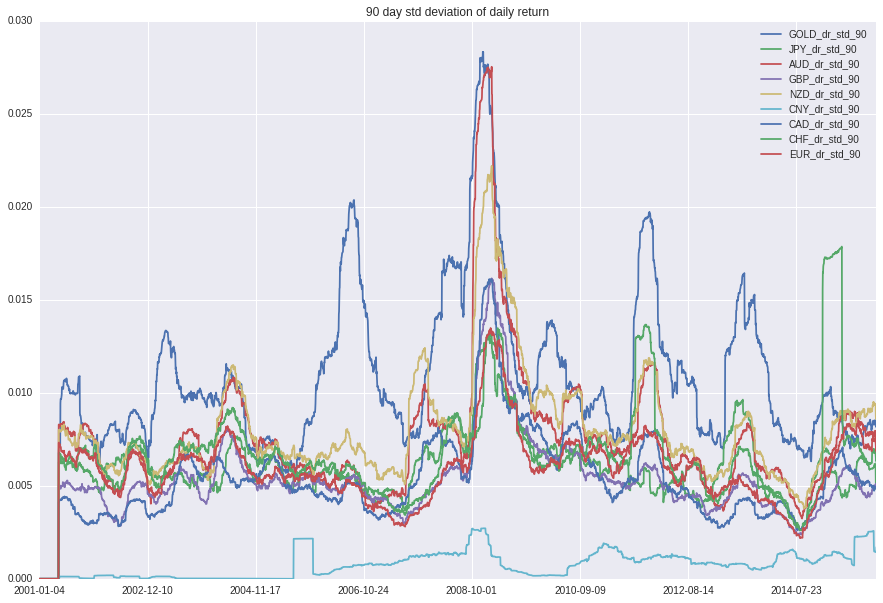

In [4]:
# Load the data
df_loaded = hlp.load_and_prepare_data(hlp.data_start_date, hlp.data_end_date)
print df_loaded.columns.values
# Add daily rate
df_daily_returns = hlp.calc_daily_ret(df_loaded)
print df_daily_returns.columns.values
# Add rolling averages
df_rolling_averages = hlp.calc_rolling_func(df_daily_returns, hlp.windows, pd.rolling_mean, 'mean')
print df_rolling_averages.columns.values
hlp.do_window_plot(df_rolling_averages, '90', '90 day mean of daily return')
# Add std deviation
df_std_deviations = hlp.calc_rolling_func(df_daily_returns, hlp.windows, pd.rolling_std, 'std')
print df_std_deviations.columns.values
hlp.do_window_plot(df_std_deviations, '90', '90 day std deviation of daily return')

df_all = pd.concat([df_loaded, df_daily_returns, df_rolling_averages, df_std_deviations], axis=1)



# Create y result matrix for all currencies

INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector


['GOLD_1' 'GOLD_7' 'GOLD_30' 'GOLD_90']
['JPY_1' 'JPY_7' 'JPY_30' 'JPY_90']
['AUD_1' 'AUD_7' 'AUD_30' 'AUD_90']

INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector



['GBP_1' 'GBP_7' 'GBP_30' 'GBP_90']
['NZD_1' 'NZD_7' 'NZD_30' 'NZD_90']

INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector



['CNY_1' 'CNY_7' 'CNY_30' 'CNY_90']
['CAD_1' 'CAD_7' 'CAD_30' 'CAD_90']

INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector
INFO:root:Create the y labels vector



['CHF_1' 'CHF_7' 'CHF_30' 'CHF_90']
['EUR_1' 'EUR_7' 'EUR_30' 'EUR_90']


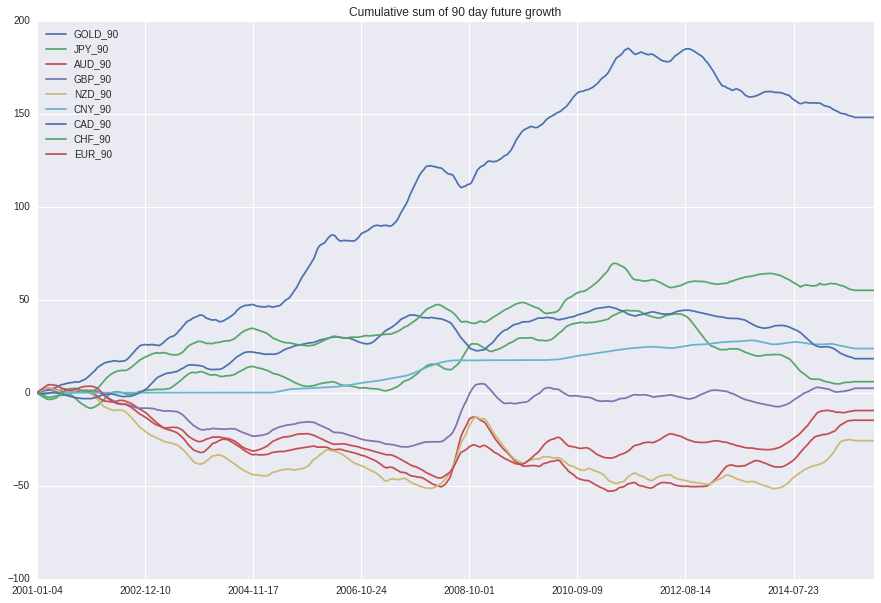

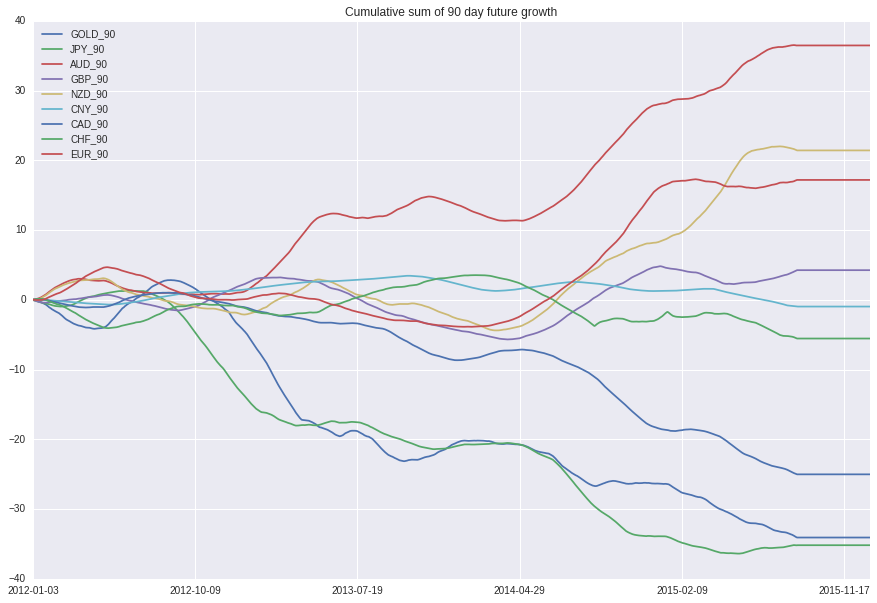

In [5]:
y_vectors = pd.DataFrame()
for curr in df_loaded.columns.values:
    df_ud = hlp.calc_future_returns(df_loaded[curr], hlp.days_ahead)
    
    print df_ud.columns.values
    y_vectors = pd.concat([y_vectors, df_ud], axis=1)

hlp.do_window_plot(y_vectors.cumsum(), '90', 'Cumulative sum of 90 day future growth')
hlp.do_window_plot(y_vectors['2012-01-01':].cumsum(), '90', 'Cumulative sum of 90 day future growth')

# Dimensionality reduction

In [6]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
pca.fit(df_all)

PCA(copy=True, n_components=None, whiten=True)

In [9]:
print pca.components_[0]
print pca.explained_variance_ratio_
print pca.mean_

[  9.99999653e-01   2.52123090e-06  -5.00791795e-04   2.21243888e-05
  -5.17296823e-04   3.31266127e-05   2.11028061e-04   3.28297752e-04
  -1.50403832e-04  -1.92235811e-07  -2.27095323e-07   2.68279039e-07
   1.28925193e-07   2.31905428e-07   2.72958411e-08  -2.87244501e-07
  -1.45160748e-07   2.98880952e-07  -2.00758668e-07  -2.06717572e-07
   2.30754830e-07   1.05966539e-07   1.97252703e-07   2.87502878e-08
  -2.63389998e-07  -1.08659136e-07   2.71566443e-07  -2.13434493e-07
  -1.97790616e-07   2.14789008e-07   9.58561068e-08   1.80898607e-07
   3.07419882e-08  -2.45517983e-07  -8.23812000e-08   2.56275823e-07
  -2.43552622e-07  -1.93557463e-07   2.06261435e-07   1.23446225e-07
   1.94796641e-07   3.47239982e-08  -2.38757319e-07  -9.11688217e-08
   2.72275381e-07  -2.63237757e-07  -1.67118340e-07   2.42619657e-07
   1.53738584e-07   2.16891159e-07   3.81341156e-08  -2.40305237e-07
  -9.43335252e-08   2.88717555e-07   8.02421940e-07  -3.47607273e-07
   2.94138438e-07  -1.13856750e-07